# Simulating Coupled Classical Harmonic Oscillators using Classiq
Authors: Viraj Dsouza, Cristina Radian, Kerem Yurtseven

Date: 02.08.2024

This work is designed under and for the final project of the Womanium Quantum+AI Program 2024

Reference Paper: Exponential Quantum Speedup in Simulating Coupled Classical Oscillators, Babbush et.al, 2023 [1](https://arxiv.org/abs/2303.13012)

## Theoretical Background:
___

We are trying to find a solution for a system of classical coupled harmonic oscillators with $N=2^n$ masses. Let $\vec{x}$ be the displacement vector
$$
    \vec{x} = \left(x_1(t),.....,x_N(t) \right)^T \in \mathbb{R}^N
    \qquad (1)
$$
So, for the system of $N$ masses connected by springs, Newton's equation becomes
$$
    m_j \ddot{x}_j(t) = \sum_{k \neq j} \kappa_{jk} \left( x_k(t) - x_j(t) \right) - \kappa_{jj} x_j(t) \qquad (2)
$$
where $j \in [N] := \{1,...,N\}$ and $\kappa_{jk}$ is the spring constant of the spring connecting the $j ^{th}$ and the $k ^{th}$ masses.

Representing Newton's Equation in matrix form:
$$
    \mathbf{M}\ddot{\vec{x}}(t) = - \mathbf{F}\vec{x}(t)
    \qquad (3)
$$
where $\mathbf{M}$ is the $N\times N$ diagonal matrix with entries $m_j > 0$ and $\mathbf{F}$ is an $N\times N$ matrix with $f_{jj}=\sum_k \kappa_{jk}$ and $f_{jk} = -\kappa_{jk}$.

___



In order to reduce Newton's Equation to a Quantum Evolution, we perform a change of variable where $\vec{y}(t) := \sqrt{\mathbf{M}}\vec{x}(t)$. Equation $(3)$ becomes:
$$
    \ddot{\vec{y}}(t) = -\mathbf{A}\vec{y}(t)
    \qquad (4)
$$
where $\mathbf{A} := \sqrt{\mathbf{M}}^{-1}\mathbf{F}\sqrt{\mathbf{M}}^{-1}$. Convert equation (4) into a similar form of Schrödinger's Equation by adding $i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)$ on both sides of equation $4$,
$$
    \ddot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)=i\sqrt{\mathbf{A}}\left(\dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t)\right)
    \qquad (5)
$$
Solution to (5) is
$$
    \dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t) = e^{it\sqrt{\mathbf{A}}}\left(\dot{\vec{y}}(0) + i\sqrt{\mathbf{A}}\vec{y}(0)\right)
    \qquad (6)
$$

___

In order to access $\sqrt{\mathbf{A}}$, define $\mathbf{B}\mathbf{B^\dagger} = \mathbf{A}$ where B is $N\times M$ and $M = N\times (N+1) /2$. However, to simulate the Hamiltonian using qubits, we need it to be a square matrix of dimension $2^{q}$ where $q$ is the number of qubits simulating $H$. To achieve this, we  pad $B$ with zeros to make its dimension $N^2\times N^2$, so that $H$ becomes a $2N^{2}X2N^{2}$ matrix which can be simulated with $q=2n+1$ qubits, where $N=2^{n}$. So, the hamiltonian after padding becomes
$$
    \mathbf{H} := -\begin{pmatrix}
\mathbf{0}{_{N^{2}XN^{2}}} & \mathbf{B}{_{N^{2}XN^{2}}}\\
\mathbf{B^\dagger}{_{N^{2}XN^{2}}} & \mathbf{0}{_{N^{2}XN^{2}}}
\end{pmatrix}_{2N^{2}X2N^{2}}
\qquad (7)
$$
(5) can be stated as:
$$
    |{\dot{\psi}(t)}\rangle = -i\mathbf{H} |{\psi(t)}\rangle
    \qquad (8)
$$
where
$$
    |{\psi(t)}\rangle \propto \begin{pmatrix}
\dot{\vec{y}}(t)\\
i\mathbf{B^\dagger}\vec{y}(t)
\end{pmatrix}
\qquad (9)
$$
is an appropriate solution to equation $(8)$

Here $\mathbf{A}$ is positive-semi definite and Hermitian by definition, Cholesky decomposition cannot be used to find $\mathbf{B}$ always since it requires $A$ to be positive definite. A method to find $\mathbf{B}$ is given by the paper
$$
    \sqrt{\mathbf{M}}\mathbf{B}|{j,k}\rangle=
    \begin{cases}
        \sqrt{\kappa_{jj}} & \text{if } j = k\\
        \sqrt{\kappa_{jk}}\left(|{j}\rangle-|{k}\rangle \right) & \text{if } j < k
    \end{cases}
    \qquad (10)
$$
where $|{j,k}\rangle$ is the bra-ket notation for the basis of complex space $\mathbb{C}^{M}$ over $\mathbb{C}$ and $j \leq k \in [N]$.
___

<!-- ##### A brief background on vector spaces:

Here is a crucial point for the difference between basis over $\mathbb{C}$ and basis over $\mathbb{R}$. If basis are given over $\mathbb{C}$, they are the complex combinations of the bases and if bases are given over $\mathbb{R}$, they are the real combinations of the basis vectors. To illustrate, let us take the bases of $\mathbb{C}^2$ and $\gamma \in \mathbb{C}^2$.
$$
    \vec{\gamma} = a_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + a_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix} + a_3\begin{pmatrix}
            i\\
            0
            \end{pmatrix} + a_4\begin{pmatrix}
            0\\
            i
            \end{pmatrix}
    \qquad (11)
$$
(11) is the span for $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{R}$ and $a_i \in \mathbb{R}$.
$$
    \vec{\gamma} = c_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + c_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix}
    \qquad (12)
$$
(12) is the span for  $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{C}$ and $c_i \in \mathbb{C}$. -->


<!-- Another crucial point is bra-ket notation. Bra-ket notation is just a different way of representing vectors introduced by Paul Dirac. Indeed, they are different from vectors and useful especially for quantum mechanics and computation with quantum operators and states. However, we can illustrate them as vectors for our case. Ordering them as increasing, they represent the unit vectors in turn. For the above example, bases can be illustrated as
\begin{align}
    |{1}\rangle &= \begin{pmatrix}
            1\\
            0
            \end{pmatrix} \qquad (13)\\
    |{2}\rangle &= \begin{pmatrix}
        0\\
        1
        \end{pmatrix} \qquad (14)
\end{align} -->

###  The Simplest Possible Case: 2-Coupled Classical Oscillators
In this example, let exist two masses with $m_1 = 1$ and $m_2 = 1$. Also, assume spring constants are $\kappa_{11} = \kappa_{22} = 0$ and $\kappa_{12} = 1$.

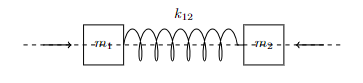

So, matrix representations are
$$
    \mathbf{M} = \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix}
            \qquad (11)
            \
$$
$$
    \mathbf{F} = \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix}
            \qquad (12)
$$
and $\mathbf{A}$ is
\begin{align}
    \mathbf{A} &= \sqrt{\mathbf{M}}^{-1}\mathbf{F}\sqrt{\mathbf{M}}^{-1}
    \qquad  (13)\\
    &=  \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix} \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix} \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix} \\
    \mathbf{A} &= \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix} = \mathbf{F}  \qquad (14)
\end{align}


In order to create $\mathbf{B}$, use (10).

For $k=j=1$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,1}\rangle = \sqrt{\kappa_{11}}|{1}\rangle

$$

$$
\mathbf{B}|{1,1}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B}\begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (15)
$$

For $k=1$ and $j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,2}\rangle = \sqrt{\kappa_{12}}\left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B}|{1,2}\rangle = \left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} - \begin{pmatrix}
    0 \\
    1
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    -1
\end{pmatrix} \qquad (16)
$$

For $k=j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{2,2}\rangle = \sqrt{\kappa_{22}}|{2} \rangle 
$$

$$
\mathbf{B}|{2,2}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (17)
$$
Combining $(15), (16), (17)$
$$
\mathbf{B}\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} 
$$

$$
\mathbf{B} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \qquad (18)
$$

Lastly, show that $\mathbf{B}\mathbf{B}^\dagger = \mathbf{A}$
$$
\begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \begin{pmatrix}
    0 & 0 \\
    1 & -1 \\
    0 & 0
\end{pmatrix} = \begin{pmatrix}
    1 & -1 \\
    -1 & 1
\end{pmatrix} \qquad (19)
$$
That ends the constitution of $\mathbf{B}$ for this example.

Following equation $(7)$ the Hamiltonian ($H$) for this case becomes
$$
\mathbf{H} = \begin{pmatrix}
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} \qquad (20)
$$

___

## Simulating the simplest Possible case:

In [ ]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import typing
import itertools
import scipy
from classiq import (
    Pauli,
    PauliTerm,
    qfunc,
    QNum,
    QArray,
    QBit,
    allocate,
    bind,
    repeat,
    CX,
    control,
    PHASE,
    Output,
    prepare_amplitudes,
    exponentiation_with_depth_constraint,
    create_model,
    set_execution_preferences,
    synthesize,
    show,
    execute
) 
from classiq.execution import ExecutionPreferences, ClassiqBackendPreferences

## Define Global Variables
PAULI_DICT = {
    "I": np.array([[1, 0], [0, 1]], dtype=np.complex128),
    "Z": np.array([[1, 0], [0, -1]], dtype=np.complex128),
    "X": np.array([[0, 1], [1, 0]], dtype=np.complex128),
    "Y": np.array([[0, -1j], [1j, 0]], dtype=np.complex128),
}

CHAR_TO_STUCT_DICT = {"I": Pauli.I, "X": Pauli.X, "Y": Pauli.Y, "Z": Pauli.Z}

### Function Declerations

In [ ]:
def create_matrix_F(K, N):
    """
        Definition:
            Compose the F matrix using the spring coefficients
        Args:
            K (nd_array NxN): Spring Coefficients - Symmetric Matrix
            N (int): Number of masses - should be 2^n
        Outputs:
            F (nd_array NxN): F matrix 
    """

    F = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            if i == j: # Sum of kappa_{ik} over all k in 1 to N
                tmp = 0
                for l in range(N):
                    tmp += K[i][l]
                F[i][i] = tmp
            if i != j: # -kappa_{ij}
                F[i][j] = -K[i][j]
    
    return F
            
def create_matrix_A(M, F):
    """
        Definition:
            Compose the A matrix using F matrix and mass matrix M
        Args:
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            F (nd_array NxN): F matrix - Symmetric Matrix
        Outputs:
            A (nd_array NxN): A matrix - PSD and Real Symmetric
    """

    rootM = np.sqrt(M)
    rootM_inverse = np.linalg.inv(rootM)

    A = np.linalg.multi_dot([rootM_inverse, F, rootM_inverse])

    return A

def coordinate_transformation(M, x_0, xdot_0):
    """
        Definition:
            Transform x coordinates to y coordinates
        Args:
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            x_0 (nd_array 1xN): Initial Positions
            xdot_0 (nd_array 1xN): Initial Velocities
        Outputs:
            Y (dict): Dictionary containing transformed coordinates    
                y_0 (nd_array 1xN): Transformed Positions
                ydot_0 (nd_array 1xN): Transformed Velocities        
    """

    y_0 = np.matmul(np.sqrt(M), x_0)
    ydot_0 = np.matmul(np.sqrt(M), xdot_0)

    Y = {"y_0": y_0, "ydot_0": ydot_0}

    return Y

def create_matrix_B(M, K, A, N):
    """
        Definition:
            Compose B matrix using eq.16
        Args:
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            K (nd_array NxN): Spring Coefficients - Symmetric Matrix
            A (nd_array NxN): A matrix - PSD and Real Symmetric
            N (int): Number of masses - should be 2^n
        Outputs:
            B (nd_array NxM): B Matrix - M = N * (N + 1) / 2
    """

    B = np.zeros((N,int(N*(N+1)/2)), dtype=complex)
    
    rootM = np.sqrt(M)
    rootM_inverse = np.linalg.inv(rootM)

    for i in range(N):
        for j in range(i,N):
            tmp = np.zeros((N,1))
            
            if i == j:
                bra = np.zeros((N,1))
                bra[i][0] = 1
                tmp = np.sqrt(K[i][j]) * bra
            
            if i != j:
                bra0 = np.zeros((N,1))
                bra1 = np.zeros((N,1))
                bra0[i][0] = 1
                bra1[j][0] = 1
                tmp = np.sqrt(K[i][j]) * (bra0 - bra1)

            tmpcol = np.matmul(rootM_inverse, tmp)

            for l in range(N):
                B[l][i+j] = tmpcol[l][0]

    return B
    
def padding_B(B, N):
    """
        Definition:
            Pad B with zeros to make it square
        Args:
            B (nd_array NxM): B Matrix - M = N * (N + 1) / 2
            N (int): Number of masses - should be 2^n
        Outputs:
            B_padded (nd_array N^2xN^2): Padded B Matrix
    """
    
    B_padded = np.zeros((int(N**2), int(N**2)), dtype=complex)
    B_padded[:N, :int(N*(N+1)/2)] = B

    return B_padded

def create_Hamiltonian(B):
    """
        Definition:
            Compose Hamiltonian Matrix eq.12
        Args:
            B (nd_array N^2xN^2): Padded B Matrix
        Outputs:
            H (nd_array 2*N^2x2*N^2): Padded Hamiltonian - Hermitian Matrix
    """

    H = -np.block([[np.zeros((B.shape[0], B.shape[0])), B], [B.conj().T, np.zeros((B.shape[1], B.shape[1]))]])

    return H

def create_init_state(B, y_0, ydot_0, N):
    """
        Definition:
            Create the initial state eq.14
        Args:
            B (nd_array N^2xN^2): Padded B Matrix
            y_0 (nd_array 1xN): Transformed Positions
            ydot_0 (nd_array 1xN): Transformed Velocities 
        Outputs:
            init_state (nd_array 1x2*N^2): Initial State to be using Hamiltonian Evolution  
    """

    y_0_padded = np.pad(y_0, ((0, N**2-N), (0, 0)), mode='constant', constant_values=0)
    init_lower = 1j * np.matmul(B.T, y_0_padded)
    ydot_0_padded = np.pad(ydot_0, ((0, N**2-N), (0, 0)), mode='constant', constant_values=0)

    init_state = np.vstack((ydot_0_padded, init_lower.reshape(-1, 1)))

    return init_state

def normalize_init_state(init_state):
    """
        Definition:
            Normalize the initial state
        Args:
            init_state (nd_array 1x2*N^2): Initial State to be using Hamiltonian Evolution  

        Outputs:
            normalization (dict): Dictionary containing normalized initial state and normalization factor
                norm (int): Normalization factor
                normalized_init_state (1D list 2*N^2): Normalized Initial State with Real Amplitudes (add pi/2 phase in evolution)
    """

    amp = 0
    for i, element in enumerate(init_state):
        amp += element * element.conj()

    norm = np.sqrt(amp)
    init_state_normalized_complex = init_state / norm

    half_index = int(len(init_state_normalized_complex) / 2)
    normalized_init_state = init_state_normalized_complex
    normalized_init_state[half_index:, 0] = -1j * init_state_normalized_complex[half_index:, 0]

    return {"norm": norm, "normalized_init_state": normalized_init_state[:,0]}

def sum_amplitudes_by_state(simulated_states):
    """
        Definition:
            Sum all the states that corresponds to same output qnum
        Args:
            simulated_states (list): Contains the state vector simulation results
        Output:
            state_amplitude_sums (dict): Amplitude and phase of each output qnum
    """
    state_amplitude_sums = {state: 0 for state in range(8)}
    
    for sim_state in simulated_states:
        state_value = sim_state.state['state']
        if state_value in state_amplitude_sums:
            state_amplitude_sums[state_value] += sim_state.amplitude
    
    return state_amplitude_sums

def normalize_final_state(state_amplitudes, parsed_state_vector):
    """
        Definition:
            Normalize the final state
        Args:
            state_amplitude_sums (dict): Amplitude and phase of each output qnum
            parsed_state_vector (dict): Results of the state vector simulation
        Output:
            final_state (nd_array 2*N^2x1): Normalized final state taking phases into account
    """

    values = np.array([state_amplitudes[i] for i in range(len(state_amplitudes))])
    global_phase = np.angle(values)[0]
    values = values / np.exp(1j * global_phase)

    normalization = np.linalg.norm(
            [
                parsed_state.amplitude
                for parsed_state in parsed_state_vector
            ]
        )

    final_state = values / normalization

    return final_state

def simplify_final_state(final_state):
    """
        Definition:
            Normalize the final state
        Args:
            final_state (nd_array 2*N^2x1): Normalized final state taking phases into account
        Output:
            simplified_final_state (nd_array 2*N^2x1): Final state with rounding
    """
    
    epsilon = 10**(-4)

    simplified_final_state = final_state
    for i, value in enumerate(final_state):
        imag = np.imag(value)
        real = np.real(value)
        
        if abs(np.real(value)) < epsilon:
            real = 0
        if abs(np.imag(value)) < epsilon:
            imag = 0
        simplified_final_state[i] = real + 1j*imag

    return simplified_final_state

def calculate_energy(pos, vel, M, K):
    """
        Definition:
            Calculate the energy at a specific time
        Args:
            pos (nd_array Nx1): Positions at a specific time
            vel (nd_array Nx1): Velocities at a specific time
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            K (nd_array NxN): Spring Coefficients - Symmetric Matrix
        Output:
            E (float): Energy of the System
    """
    
    K_E = (np.linalg.multi_dot((vel.T, M, vel))) / 2
    
    U_E = 0
    for i in range(M.shape[0]):
        for j in range(i, M.shape[0]):
            if i == j:
                U_E += K[i][i] * pos[i][0]**2
            if i != j:
                U_E += K[i][j] * (pos[i][0] - pos[j][0])**2
    U_E = U_E / 2
    
    E = U_E + K_E

    return E

def post_process_final_state(final_state, B, N, M, K, y_0):
    """
        Definition:
            Find the final position and velocity vectors
        Args:
            final_state (nd_array 1x2*N^2): Normalized final state taking phases into account
            B (nd_array N^2xN^2): Padded B Matrix 
            N (int): Number of masses - should be 2^n
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            K (nd_array NxN): Spring Coefficients - Symmetric Matrix
            y_0 (nd_array 1xN): Initial Position of Masses in Y Coordinates
        Output:
            results (dict): Dictionary containing final position and velocity vectors
    """

    ydot_final = final_state[:N]

    last_half = final_state[N**2:]

    if np.linalg.matrix_rank(B) == B.shape[0] or np.linalg.matrix_rank(B) == B.shape[1]:
        y_final = np.linalg.solve(B, last_half)[:N]
    else:
        y_final_0_padded = np.linalg.lstsq(B.T,-1j*last_half)[0]
        
        U, S, Vt = np.linalg.svd(B.T)
        rank = np.sum(S > 1e-10)
        null_space = Vt[rank:].T
        null_space_reduced = null_space[:, -1]
        null_space_reduced = null_space_reduced[..., None]

        y_0sum = np.sum(y_0)
        def pos_sum(c):
            
            y_guess = (c * null_space_reduced[:N] + y_final_0_padded[:N]).real

            return abs(np.sum(y_guess) - y_0sum)
        
        c_optimized = scipy.optimize.minimize(pos_sum, x0=0)

        y_final = c_optimized.x * null_space_reduced[:N] + y_final_0_padded[:N]
         
    return {"y_final": y_final, "ydot_final": ydot_final}
        
def calculate_error(x_quantum, xdot_quantum, x_classic, xdot_classic, N):
    """
        Definition:
            Compare the signs and amplitudes of the final solutions
        Args:
            x_quantum (array Nx1): Final positions taken from quantum solution
            xdot_quantum (array Nx1): Final velocities taken from quantum solution
            x_classical (1D list N): Final positions taken from classical solution
            xdot_classical (1D list N): Final velocities taken from classical solution
            N (int): Number of masses - should be 2^n
        Output:
            (dict): Dictionary containing sign errors and amplitude errors
                errors (dict): Error percent for each value
                sign_check (dict): Sign check for each value
    """

    errors = {}
    sign_check = {}

    for i in range(1, N+1):
        errors.update({f"Position of Mass {i}": 0})
        errors.update({f"Velocity of Mass {i}": 0})
        sign_check.update({f"Position of Mass {i}": "-"})
        sign_check.update({f"Velocity of Mass {i}": "-"})

    for i in range(N):
        errors[f"Position of Mass {i + 1}"] = (abs(abs(x_quantum[i]) - abs(x_classic[i])) / abs(x_classic[i]) * 100)[0]
        errors[f"Velocity of Mass {i + 1}"] = (abs(abs(xdot_quantum[i]) - abs(xdot_classic[i])) / abs(xdot_classic[i]) * 100)[0]

        if np.sign(x_quantum[i]) == np.sign(x_classic[i]):
            sign_check[f"Position of Mass {i+1}"] = "+"
        if np.sign(xdot_quantum[i]) == np.sign(xdot_classic[i]):
            sign_check[f"Velocity of Mass {i+1}"] = "+"

    return {"amplitude_error": errors, "sign_error": sign_check}

def back_coordinate_transformation(M, y_final, ydot_final):
    """
        Definition:
            Transform y coordinates to x coordinates
        Args:
            M (nd_array NxN): Mass Matrix - Diagonal Matrix
            y_final (nd_array 1xN): Final Positions in y coordinates
            ydot_final (nd_array 1xN): Final Velocities in y coordinates
        Outputs:
            X (dict): Dictionary containing transformed coordinates    
                x_final (nd_array 1xN): Transformed Positions
                xdot_final (nd_array 1xN): Transformed Velocities        
    """

    x_final = np.matmul(np.linalg.inv(np.sqrt(M)), y_final)
    xdot_final = np.matmul(np.linalg.inv(np.sqrt(M)), ydot_final)

    X = {"x_final": x_final, "xdot_final": xdot_final}

    return X

Below functions for Pauli Decomposition is taken from [Classiq Library](https://github.com/Classiq/classiq-library/blob/main/algorithms/hhl/hhl/hhl.ipynb) thanks a lot to the authors!

In [ ]:
def generate_all_pauli_strings(paulis, n):
    """
        Definition:
            Create all combination of Pauli Matrices for n qubits
        Args:
            paulis (string): Name of the Pauli Matrices
            n (int): log2(2*N^2) where N is the number of masses
        Outputs:
            pauli_comb (list of strings): All combination of Pauli Matrices
    """    
    for s in itertools.product(paulis, repeat=n):
        yield "".join(s)

def pauli_string_2mat(seq):
    """
        Definition:
            Transform a Pauli Matrix Sequence to a single Matrix
        Args:
            seq (string): Name of the Pauli Matrices as a sequence
        Outputs:
            pauli_mat (nd_array): Multipication of Pauli Matrices
    """ 
    pauli_mat = PAULI_DICT[seq[0]]
    for p in seq[1:]:
        pauli_mat = np.kron(pauli_mat, PAULI_DICT[p])
    return pauli_mat

def hilbert_schmidt(M1, M2):
    """
        Definition:
            Hilbert-Schmidt Product of two matrices
        Args:
            M1 (nd_array): Matrix 1
            M2 (nd_array): Matrix 2
        Outputs:
            (nd_array): Product result
    """ 
    return (np.dot(M1.conjugate().transpose(), M2)).trace()

def lcu_naive(H):
    """
        Definition:
            Create the Pauli-Matrix-Decomposition of Hamiltonian
        Args:
            H (nd_array 2*N^2x2*N^2): Padded Hamiltonian - Hermitian Matrix
        Outputs:
            pauli_list (list): Each Pauli Matrix sequence with non-zero coefficient
    """

    assert H.shape[0] == H.shape[1], "Matrix is not square"
    assert H.shape[0] != 0, "Matrix is of size 0"
    assert H.shape[0] & (H.shape[0] - 1) == 0, "Matrix size is not 2**n"

    n = int(np.log2(H.shape[0]))
    possible_pauli_list = list(generate_all_pauli_strings("IZXY", n))

    pauli_list = []

    for pstr in possible_pauli_list:
        co = (1 / 2**n) * hilbert_schmidt(pauli_string_2mat(pstr), H)
        if co != 0:
            pauli_list = pauli_list + [(pstr, co)]

    return pauli_list

def pauli_str_to_enums(pauli):
    """
        Definition:
            Create Classiq Pauli matrices for Pauli Matrix Sequence
        Args:
            pauli (string): Pauli Matrix Sequence String
        Outputs:
            (list): Classiq Pauli Matrices
    """
    return [CHAR_TO_STUCT_DICT[s] for s in pauli]

def pauli_list_to_hamiltonian(pauli_list):
    """
        Definition:
            Create complete Pauli list for a given Hamiltonian
        Args:
            pauli_list (list): Each Pauli Matrix sequence with non-zero coefficient
        Outputs:
            (list): Classiq PauliTerm function with appropriate Pauli matrices
    """
    return [
        PauliTerm(
            pauli=pauli_str_to_enums(pauli), coefficient=typing.cast(complex, coeff).real
        )
        for pauli, coeff in pauli_list
    ]

### Pre-Processing before quantum evolution:
- Create B Matrix, Hamiltonian and initial state

In [78]:
### Providing all inputs for 2 coupled SHO case and performing all the initial transformations

# Number of masses
N=2

# Masses
m_1= 0.5
m_2= 0.5

# Spring Constant
k_11= 2
k_22= 2
k_12= 3

# Mass Matrix
M= np.array([[m_1, 0], [0, m_2]])
# Sping Constant Matrix
K= np.array([[k_11, k_12], [k_12, k_22]])

# Initial Conditions
x_0 = np.array([[1], [0]])
xdot_0 = np.array([[0], [0]])

# F Matrix
F= create_matrix_F(K, N)

# A Matrix
A = create_matrix_A(M, F)

# Transform coordinates
y = coordinate_transformation(M, x_0, xdot_0)
y_0 = y["y_0"]
ydot_0 = y["ydot_0"]

# B Matrix
B = create_matrix_B(M, K, A, N)

# Stacking B with zeros to get square matrix N^2 x N^2
B_padded = padding_B(B, N)

# Hamiltonian
H = create_Hamiltonian(B_padded)

# Initial State
init_state = create_init_state(B_padded, y_0, ydot_0, N)
E0_y = calculate_energy(y_0, ydot_0, M, K)

# Normalize the Initial State
normalization = normalize_init_state(init_state)
normalized_init_state = normalization["normalized_init_state"]
norm = normalization["norm"]

# Print the results
print("Initial Energy: ", E0_y)
print("B matrix: ", B)
print("Hamiltonian formed:", H)
print("Initial State:", init_state)

Initial Energy:  [[1.25]]
B matrix:  [[ 2.        +0.j  2.44948974+0.j  0.        +0.j]
 [ 0.        +0.j -2.44948974+0.j  2.        +0.j]]
Hamiltonian formed: [[-0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j
  -2.        -0.j -2.44948974-0.j -0.        -0.j -0.        -0.j]
 [-0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j
  -0.        -0.j  2.44948974-0.j -2.        -0.j -0.        -0.j]
 [-0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j
  -0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j]
 [-0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j
  -0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j]
 [-2.        +0.j -0.        +0.j -0.        +0.j -0.        +0.j
  -0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j]
 [-2.44948974+0.j  2.44948974+0.j -0.        +0.j -0.        +0.j
  -0.        -0.j -0.        -0.j -0.        -0.j -0.        -0.j]
 [-0.        +0.j -2.        +0.j -0.     

- Find the Pauli Matrix Decomposition

In [79]:
# Create the Pauli Matrix Decomposition of the Hamiltonian
pauli_list = lcu_naive(H)

# Transform Pauli Matrix Decomposition to Classiq compatible
classiq_pauli_list = pauli_list_to_hamiltonian(pauli_list)

print(pauli_list)

[('XII', (0.11237243569579447+0j)), ('XIZ', (-1.1123724356957945+0j)), ('XIX', (-0.6123724356957945+0j)), ('XZI', (0.11237243569579447+0j)), ('XZZ', (-1.1123724356957945+0j)), ('XZX', (-0.6123724356957945+0j)), ('XXX', (-0.5+0j)), ('XYY', (-0.5+0j)), ('YIY', (0.6123724356957945+0j)), ('YZY', (0.6123724356957945+0j)), ('YXY', (-0.5+0j)), ('YYX', (0.5+0j))]


### Hamiltonian simulation

We use the `exponentiation_with_depth_constraint` function of classiq that produces a quantum gate that approximates $e^{iHt}$, for any input **Hermitian operator** $H$. Since the Hamiltonian for this algorithm is Hermitian by definition, exponentian method can be used straightforwardly. The Classiq engine automatically generates an efficient higher-order Trotter-Suzuki quantum program that minimizes the functional error and satisfies a given local constraint on the depth. 

In [80]:
### Define function for Quantum Algorithm

@qfunc
def init_state_phase(state: QNum):
    """
        Definition:
            Imply -pi/2 phase to the last half (msb qubit) of the QNum state in order to add -i factor
        Args:
            state (QNum): Initial state with bare amplitudes
        Outputs:
            state (QNum): Initial state with phase
    """

    state_in_qubit = QArray("state_in_qubit")
    msb = QArray("msb", QBit)
    
    size = np.log2(init_state.size)
    allocate(size, msb)

    bind(state, state_in_qubit)
    repeat(state_in_qubit.len, lambda i: CX(state_in_qubit[i], msb[i]))
    control(msb[size-1], lambda: PHASE(np.pi/2, state_in_qubit[size-1]))
    bind(state_in_qubit, state)


@qfunc
def main(state: Output[QNum]):
    """
        Definition:
            Main function to make evolution

        Outputs:
            state (Output[QNum]): Resulting state at the t = evolution_coefficient
    """
        
    prepare_amplitudes(amplitudes=list(normalized_init_state), out=state, bound=0.000000000001)
    init_state_phase(state)

    exponentiation_with_depth_constraint(
        classiq_pauli_list,
        evolution_coefficient=10,
        max_depth=1000,
        qbv=state)

In [81]:
# Synthesize the Quantum Algorithm with state vector simulation since phase is important
qmod = create_model(main)
backend_preferences = ClassiqBackendPreferences(backend_name="simulator_statevector")
model_pref = set_execution_preferences(qmod, ExecutionPreferences(num_shots=4000, backend_preferences=backend_preferences))
qprog = synthesize(model_pref)
#show(qprog)

In [82]:
# Execute the program and get parsed results
job = execute(qprog)
parsed_state_vector = job.result()[0].value.parsed_state_vector
parsed_state_vector

[SimulatedState(state={'state': 0.0}, bitstring='100000', amplitude=(0.11576834275575734+0.5243488171038775j)),
 SimulatedState(state={'state': 4.0}, bitstring='101100', amplitude=(0.4827737930707061-0.10658920193317717j)),
 SimulatedState(state={'state': 1.0}, bitstring='101001', amplitude=(-0.10575571574771328-0.4789986894023266j)),
 SimulatedState(state={'state': 6.0}, bitstring='101110', amplitude=(-0.21374663946193395+0.047192047379446024j)),
 SimulatedState(state={'state': 2.0}, bitstring='100010', amplitude=(0.04493495889371981+0.20352362296695664j)),
 SimulatedState(state={'state': 6.0}, bitstring='100110', amplitude=(0.18726286400542286-0.04134482756220316j)),
 SimulatedState(state={'state': 0.0}, bitstring='101000', amplitude=(0.03806611121129921+0.17241259493107283j)),
 SimulatedState(state={'state': 2.0}, bitstring='101010', amplitude=(-0.03480767417504736-0.15765417682731847j)),
 SimulatedState(state={'state': 1.0}, bitstring='100001', amplitude=(0.026506408814703335+0.120

### Post-Processing
- Obtain final velocity and position vectors

In [83]:
# Find the results in QNum format
state_amplitudes = sum_amplitudes_by_state(parsed_state_vector)
state_amplitudes

{0: (0.15383445396705656+0.6967614120349503j),
 1: (-0.07924930693300992-0.35894338087134975j),
 2: (0.01012728471867248+0.04586944613963823j),
 3: (0.0026425010838616553+0.011968663319661926j),
 4: (0.5594231219783439-0.12351222243313116j),
 5: (0.1389833128652898-0.030685427860768277j),
 6: (-0.026483775456511198+0.005847219817242949j),
 7: (0.06311631266429564-0.013935133788149649j)}

In [84]:
# Normalize the final state
normalized_final_state = normalize_final_state(state_amplitudes, parsed_state_vector)
normalized_final_state

array([ 7.13541523e-01+0.00000000e+00j, -3.67587817e-01+2.62897716e-15j,
        4.69741204e-02+4.84463574e-16j,  1.22569047e-02+5.56455539e-16j,
        1.77523715e-15-5.72895713e-01j, -1.49404501e-15-1.42330449e-01j,
        3.37430573e-15+2.71215844e-02j, -1.62447751e-15-6.46363433e-02j])

In [85]:
# Simplify the final state by neglecting small terms
simplified_final_state = simplify_final_state(normalized_final_state)
simplified_final_state

array([ 0.71354152+0.j        , -0.36758782+0.j        ,
        0.04697412+0.j        ,  0.0122569 +0.j        ,
        0.        -0.57289571j,  0.        -0.14233045j,
        0.        +0.02712158j,  0.        -0.06463634j])

In [86]:
# Correct the normalization factor that comes from the normalization of initial state and transform the row vector to column vector
final_state = norm * simplified_final_state[..., None]
final_state

array([[ 1.59552735+0.j        ],
       [-0.82195135+0.j        ],
       [ 0.10503733+0.j        ],
       [ 0.02740727+0.j        ],
       [ 0.        -1.28103376j],
       [ 0.        -0.31826056j],
       [ 0.        +0.06064571j],
       [ 0.        -0.14453126j]])

Compare the results with classical evolution to check quantum Hamiltonian evolution

In [87]:
H_qutip = qt.Qobj(H)
rho0 = qt.Qobj(init_state)
tlist = np.linspace(0,10,100)
results1 = qt.mesolve(H_qutip,rho0, tlist,[],[])
results1.states[-1]

Quantum object: dims=[[8], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[-1.6992809 +0.j        ]
 [ 0.40818162+0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        -0.18303032j]
 [ 0.        -1.15514962j]
 [ 0.        +0.76014539j]
 [ 0.        +0.j        ]]

In [93]:
# Get the final position and velocity vectors
final_results = post_process_final_state(final_state, B_padded, N, M, K, y_0)
y_final = final_results["y_final"]
ydot_final = final_results["ydot_final"]

C:\Users\Kerem\AppData\Local\Temp\ipykernel_19092\786379792.py:301: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y_final_0_padded = np.linalg.lstsq(B.T,-1j*last_half)[0]


In [94]:
x_final_results = back_coordinate_transformation(M, y_final, ydot_final)
x_final = x_final_results["x_final"]
xdot_final = x_final_results["xdot_final"]

print("Final Positions", x_final)
print("Final Velocities", xdot_final)

Final Positions [[-0.12942198+0.j]
 [ 0.53750396+0.j]]
Final Velocities [[-2.40314609+0.j]
 [ 0.57725598+0.j]]


### Classical Numeric Solution
- Solve the system with numeric methods

In [90]:
# Initial conditions: [x1(0), v1(0), x2(0), v2(0)]
initial_conditions = [x_0[0][0], x_0[1][0], xdot_0[0][0], xdot_0[1][0]]

# Define the equations of motion
def equations_of_motion(t, init):
    """
        Definition:
            EOM for classical coupled oscillator system with 2 mass
        Args:
            t (array): Time array
            init (list): Initial Conditions
        Output:
            (list): List of final equations
    """
    x1, x2, v1, v2 = init
    dx1dt = v1
    dv1dt = (-k_11 * x1 + k_12 * (x2 - x1)) / m_1
    dx2dt = v2
    dv2dt = (-k_22 * x2 + k_12 * (x1 - x2)) / m_2
    return [dx1dt, dx2dt, dv1dt, dv2dt]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of differential equations
solution = scipy.integrate.solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the results
x1 = solution.y[0]
x2 = solution.y[1]
v1 = solution.y[2]
v2 = solution.y[3]

# Get the results numerically
x_classic =np.array([x1[-1], x2[-1]])
xdot_classic =np.array([v1[-1], v2[-1]])

print("Position Vectors at t=10 classically")
print(x_classic)
print("Velocity Vectors at t=10 classically")
print(xdot_classic)

Position Vectors at t=10 classically
[-0.13286208  0.54082384]
Velocity Vectors at t=10 classically
[-2.38923377  0.56343269]


### Comparision between Classical and Quantum Solutions

In [91]:
# Compare two solutions
comparision = calculate_error(x_final, xdot_final, x_classic, xdot_classic, N)
amplitude_error = comparision["amplitude_error"]
sign_error = comparision["sign_error"]

print(amplitude_error)
print(sign_error)

{'Position of Mass 1': 365.871534658014, 'Velocity of Mass 1': 5.558993833615176, 'Position of Mass 2': 54.88770089411745, 'Velocity of Mass 2': 106.3094259881517}
{'Position of Mass 1': '+', 'Velocity of Mass 1': '-', 'Position of Mass 2': '-', 'Velocity of Mass 2': '-'}


### What is Next? and Known Problems
- The code works neatly for 2 masses system with different masses, spring constants, and initial conditions. However, signs of velocities are reversed. Moreover, in some cases, position of masses are interchanged compared to classical solution
- In post-processing, there are infinitely many possibilities for the position vector. It is crucial to find a way to choose correct one
- Methods use lots of classical computation. Using more quantum algorithms can be helpful
- Generalization is an obstacle especially with larger matrix where classical computation cannot be capable of

### References
- [1](https://arxiv.org/abs/2303.13012) Exponential Quantum Speedup in Simulating Coupled Classical Oscillators, Babbush et.al, 2023
- [2](https://github.com/Classiq/classiq-library/blob/main/algorithms/hhl/hhl/hhl.ipynb) Classiq Tutorial for HHL
- [3](https://docs.classiq.io/latest/) Classiq Documentation
- Thanks to Eden Schirman, Tomer Goldfriend, and all the Classiq crew!
- Special thanks to Womanium crew for designing and organizing such a good program!